In [4]:
# Render our plots inline
%matplotlib inline

from pathlib import Path

#import the pandas library and aliasing as pd
import pandas as pd

#import the matplotlib library and aliasing as plt
import matplotlib.pyplot as plt

#import the numpy library and aliasing as np
import numpy as np

#pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
#plt.rcParams['figure.figsize'] = (15, 5)

# Create Series

Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index. The basic method to create a Series is to call:

In [22]:
data = np.arange(10)
i = np.arange(1,11)

In [23]:
s = pd.Series(data, index=i)
s

1     0
2     1
3     2
4     3
5     4
6     5
7     6
8     7
9     8
10    9
dtype: int32

A basic series, which can be created is an Empty Series.

In [4]:
#Create an Empty Series

s = pd.Series()
print(s)

Series([], dtype: float64)


## Create a Series from ndarray

If data is an ndarray, then index passed must be of the same length. If no index is passed, then by default index will be range(n) where n is array length, i.e., [0,1,2,3…. range(len(array))-1].

In [27]:
#Example 1

data = np.array(['a','b','c','d','e'] )
s = pd.Series(data)
print(s)

0    a
1    b
2    c
3    d
4    e
dtype: object


We did not pass any index, so by default, it assigned the indexes ranging from 0 to len(data)-1, i.e., 0 to 3.

In [28]:
#Example 2

data = np.array(['a','b','c','d'])
s = pd.Series(data,index=[10,11,12,13])
print(s)

10    a
11    b
12    c
13    d
dtype: object


We passed the index values here. Now we can see the customized indexed values in the output.

## Create a Series from dict

A dict can be passed as input and if no index is specified, then the dictionary keys are taken in a sorted order to construct index. If index is passed, the values in data corresponding to the labels in the index will be pulled out.

In [7]:
#Example 1

data = {'a' : 0., 'b' : 1., 'c' : 2.}
s = pd.Series(data)
print(s)

a    0.0
b    1.0
c    2.0
dtype: float64


In [32]:
#Example 2

data = {'a' : 0., 'b' : 1., 'c' : 2.}
s = pd.Series(data,index=['a','c','c','b'])
print(s)

a    0.0
c    2.0
c    2.0
b    1.0
dtype: float64


Observe − Index order is persisted and the missing element is filled with NaN (Not a Number).

# Create Data Frame

DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different kinds of input:

- Dict of 1D ndarrays, lists, dicts, or Series
- 2-D numpy.ndarray
- Structured or record ndarray
- A Series
- Another DataFrame

Along with the data, you can optionally pass index (row labels) and columns (column labels) arguments. If you pass an index and / or columns, you are guaranteeing the index and / or columns of the resulting DataFrame. Thus, a dict of Series plus a specific index will discard all data not matching up to the passed index.

## Create an Empty DataFrame

A basic DataFrame, which can be created is an Empty Dataframe.

In [9]:
df = pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


## Create a DataFrame from Lists

The DataFrame can be created using a single list or a list of lists.

In [45]:
#Example 1

data = [1,2,3,4,5]
df = pd.DataFrame(data)
print(df)

   0
0  1
1  2
2  3
3  4
4  5


In [46]:
#Example 2

data = [['Alex',10],['Bob',12],['Clarke',13]]
df = pd.DataFrame(data,columns=['Name','Age'])
print(df)

     Name  Age
0    Alex   10
1     Bob   12
2  Clarke   13


In [47]:
#Example 3

data = [['Alex',10],['Bob',12],['Clarke',13]]
df = pd.DataFrame(data,columns=['Name','Age'],dtype=float)
print(df)

     Name   Age
0    Alex  10.0
1     Bob  12.0
2  Clarke  13.0


Note − Observe, the dtype parameter changes the type of Age column to floating point.

## Create a DataFrame from Dict of ndarrays / Lists

All the ndarrays must be of same length. If index is passed, then the length of the index should equal to the length of the arrays.

If no index is passed, then by default, index will be range(n), where n is the array length.

In [48]:
#Example 1

data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
df = pd.DataFrame(data)
print(df)

    Name  Age
0    Tom   28
1   Jack   34
2  Steve   29
3  Ricky   42


Note − Observe the values 0,1,2,3. They are the default index assigned to each using the function range(n).

Let us now create an indexed DataFrame using arrays.

In [49]:
#Example 2

data = {'Name':['Tom', 'Jack', 'Steve', 'Ricky'],'Age':[28,34,29,42]}
df = pd.DataFrame(data, index=['rank1','rank2','rank3','rank4'])
print(df)

        Name  Age
rank1    Tom   28
rank2   Jack   34
rank3  Steve   29
rank4  Ricky   42


## Create a DataFrame from List of Dicts

List of Dictionaries can be passed as input data to create a DataFrame. The dictionary keys are by default taken as column names.

The following example shows how to create a DataFrame by passing a list of dictionaries.

In [50]:
#Example 1

data = [{'a': 1, 'b': 2},{'a': 5, 'b': 10, 'c': 20}]
df = pd.DataFrame(data)
print(df)

   a   b     c
0  1   2   NaN
1  5  10  20.0


Note − Observe, NaN (Not a Number) is appended in missing areas.

The following example shows how to create a DataFrame by passing a list of dictionaries and the row indices.

In [51]:
#Example 2

data = [{'a': 1, 'b': 2},{'a': 5, 'b': 10, 'c': 20}]
df = pd.DataFrame(data, index=['first', 'second'])
print(df)

        a   b     c
first   1   2   NaN
second  5  10  20.0


The following example shows how to create a DataFrame with a list of dictionaries, row indices, and column indices.

In [52]:
#Example 3

data = [{'a': 1, 'b': 2},{'a': 5, 'b': 10, 'c': 20}]

#With two column indices, values same as dictionary keys
df1 = pd.DataFrame(data, index=['first', 'second'], columns=['a', 'b'])

#With two column indices with one index with other name
df2 = pd.DataFrame(data, index=['first', 'second'], columns=['a', 'b','c','b1'])
print(df1)
print(df2)

        a   b
first   1   2
second  5  10
        a   b     c  b1
first   1   2   NaN NaN
second  5  10  20.0 NaN


Note − Observe, df2 DataFrame is created with a column index other than the dictionary key; thus, appended the NaN’s in place. Whereas, df1 is created with column indices same as dictionary keys, so NaN’s appended.

## Reading data from a csv file

You can read data from a CSV file using the `read_csv` function. By default, it assumes that the fields are comma-separated.

We're going to be looking some cyclist data from Montréal. Here's the [original page](http://donnees.ville.montreal.qc.ca/dataset/velos-comptage) (in French), but it's already included in this repository. We're using the data from 2012.

This dataset is a list of how many people were on 7 different bike paths in Montreal, each day.

In [33]:
# define the path to the folder data
DATA_PATH = Path.cwd() / "data"

In [56]:
broken_df = pd.read_csv(DATA_PATH / "bikes.csv",encoding="latin1")

In [57]:
# Look at the first 5 rows
broken_df.head()

,Date;Berri 1;Brébeuf (données non disponibles);Côte-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (données non disponibles)
0,01/01/2012;35;;0;38;51;26;10;16;
1,02/01/2012;83;;1;68;153;53;6;43;
2,03/01/2012;135;;2;104;248;89;3;58;
3,04/01/2012;144;;1;116;318;111;8;61;
4,05/01/2012;197;;2;124;330;97;13;95;


You'll notice that this is totally broken! `read_csv` has a bunch of options that will let us fix that, though. Here we'll

* change the column separator to a `;`
* Parse the dates in the 'Date' column
* Tell it that our dates have the day first instead of the month first
* Set the index to be the 'Date' column

In [62]:
fixed_df = pd.read_csv(DATA_PATH / "bikes.csv", sep=';', encoding='latin1', parse_dates=['Date'], dayfirst=True, index_col='Date')


In [63]:
# Look at the first 3 rows
fixed_df.head(3)

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN


In [38]:
# Look at the last 5 rows
fixed_df.tail()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-11-01,2405,NaN,1208,1701,3082,2076,165,2461,NaN
2012-11-02,1582,NaN,737,1109,2277,1392,97,1888,NaN
2012-11-03,844,NaN,380,612,1137,713,105,1302,NaN
2012-11-04,966,NaN,446,710,1277,692,197,1374,NaN
2012-11-05,2247,NaN,1170,1705,3221,2143,179,2430,NaN


In [63]:
# get the shape of the data frame
fixed_df.shape

(310, 9)

In [73]:
#To change the daTA TYPE of a column
fixed_df['Berri 1']=fixed_df['Berri 1'].astype('float64')

In [74]:
#looking at the variable types
fixed_df.dtypes

Berri 1                                float64
Brébeuf (données non disponibles)      float64
Côte-Sainte-Catherine                    int64
Maisonneuve 1                            int64
Maisonneuve 2                            int64
du Parc                                  int64
Pierre-Dupuy                             int64
Rachel1                                  int64
St-Urbain (données non disponibles)    float64
dtype: object

In [29]:
#to get the indices
fixed_df.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name='Date', length=310, freq=None)

In [75]:
#to get the column names
fixed_df.index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-10-27', '2012-10-28', '2012-10-29', '2012-10-30',
               '2012-10-31', '2012-11-01', '2012-11-02', '2012-11-03',
               '2012-11-04', '2012-11-05'],
              dtype='datetime64[ns]', name='Date', length=310, freq=None)

In [76]:
#to get the index names or values
fixed_df.columns

Index(['Berri 1', 'Brébeuf (données non disponibles)', 'Côte-Sainte-Catherine',
       'Maisonneuve 1', 'Maisonneuve 2', 'du Parc', 'Pierre-Dupuy', 'Rachel1',
       'St-Urbain (données non disponibles)'],
      dtype='object')

In [77]:
#to get the values
fixed_df.values

array([[3.500e+01,       nan, 0.000e+00, ..., 1.000e+01, 1.600e+01,
              nan],
       [8.300e+01,       nan, 1.000e+00, ..., 6.000e+00, 4.300e+01,
              nan],
       [1.350e+02,       nan, 2.000e+00, ..., 3.000e+00, 5.800e+01,
              nan],
       ...,
       [8.440e+02,       nan, 3.800e+02, ..., 1.050e+02, 1.302e+03,
              nan],
       [9.660e+02,       nan, 4.460e+02, ..., 1.970e+02, 1.374e+03,
              nan],
       [2.247e+03,       nan, 1.170e+03, ..., 1.790e+02, 2.430e+03,
              nan]])

In [83]:
fixed_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 310 entries, 2012-01-01 to 2012-11-05
Data columns (total 9 columns):
Berri 1                                310 non-null float64
Brébeuf (données non disponibles)      0 non-null float64
Côte-Sainte-Catherine                  310 non-null int64
Maisonneuve 1                          310 non-null int64
Maisonneuve 2                          310 non-null int64
du Parc                                310 non-null int64
Pierre-Dupuy                           310 non-null int64
Rachel1                                310 non-null int64
St-Urbain (données non disponibles)    0 non-null float64
dtypes: float64(3), int64(6)
memory usage: 24.2 KB


In [82]:
#to get quick statistics about the data
fixed_df.describe()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
count,310.000000,0.0,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,0.0
mean,2985.048387,NaN,1233.351613,1983.325806,3510.261290,1862.983871,1054.306452,2873.483871,NaN
std,2169.271062,NaN,944.643188,1450.715170,2484.959789,1332.543266,1064.029205,2039.315504,NaN
min,32.000000,NaN,0.000000,33.000000,47.000000,18.000000,0.000000,0.000000,NaN
25%,596.000000,NaN,243.250000,427.000000,831.000000,474.750000,53.250000,731.000000,NaN
50%,3128.000000,NaN,1269.000000,2019.500000,3688.500000,1822.500000,704.000000,3223.500000,NaN
75%,4973.250000,NaN,2003.000000,3168.250000,5731.750000,3069.000000,1818.500000,4717.250000,NaN
max,7077.000000,NaN,3124.000000,4999.000000,8222.000000,4510.000000,4386.000000,6595.000000,NaN


In [91]:
fixed_df.sort_values('Berri 1')

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-14,32.0,NaN,0,54,56,19,0,1,NaN
2012-01-01,35.0,NaN,0,38,51,26,10,16,NaN
2012-01-21,53.0,NaN,0,47,70,32,1,0,NaN
2012-01-15,54.0,NaN,0,33,60,18,0,0,NaN
2012-02-25,62.0,NaN,0,48,52,18,2,5,NaN
2012-02-11,71.0,NaN,0,63,112,49,3,0,NaN
2012-01-22,71.0,NaN,0,41,73,35,5,0,NaN
2012-02-05,72.0,NaN,0,46,133,54,7,0,NaN
2012-01-13,75.0,NaN,0,41,105,64,2,0,NaN


In [88]:
# for sorting the index
fixed_df.sort_index(ascending=False)

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-11-05,2247.0,NaN,1170,1705,3221,2143,179,2430,NaN
2012-11-04,966.0,NaN,446,710,1277,692,197,1374,NaN
2012-11-03,844.0,NaN,380,612,1137,713,105,1302,NaN
2012-11-02,1582.0,NaN,737,1109,2277,1392,97,1888,NaN
2012-11-01,2405.0,NaN,1208,1701,3082,2076,165,2461,NaN
2012-10-31,2634.0,NaN,1294,1835,3453,2220,245,2570,NaN
2012-10-30,2887.0,NaN,1251,2007,3516,2255,338,2790,NaN
2012-10-29,2919.0,NaN,1458,2071,3768,2440,411,2795,NaN
2012-10-28,1310.0,NaN,697,910,1776,955,387,1876,NaN


In [93]:
#for sorting by a column
fixed_df.sort_values(by='Berri 1')

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-14,32.0,NaN,0,54,56,19,0,1,NaN
2012-01-01,35.0,NaN,0,38,51,26,10,16,NaN
2012-01-21,53.0,NaN,0,47,70,32,1,0,NaN
2012-01-15,54.0,NaN,0,33,60,18,0,0,NaN
2012-02-25,62.0,NaN,0,48,52,18,2,5,NaN
2012-02-11,71.0,NaN,0,63,112,49,3,0,NaN
2012-01-22,71.0,NaN,0,41,73,35,5,0,NaN
2012-02-05,72.0,NaN,0,46,133,54,7,0,NaN
2012-01-13,75.0,NaN,0,41,105,64,2,0,NaN


## Selecting Values

When you read a CSV, you get a kind of object called a `DataFrame`, which is made up of rows and columns. You can select columns, rows or a range of them.

In [40]:
# selecting columns
fixed_df['Berri 1']

Date
2012-01-01      35
2012-01-02      83
2012-01-03     135
2012-01-04     144
2012-01-05     197
2012-01-06     146
2012-01-07      98
2012-01-08      95
2012-01-09     244
2012-01-10     397
2012-01-11     273
2012-01-12     157
2012-01-13      75
2012-01-14      32
2012-01-15      54
2012-01-16     168
2012-01-17     155
2012-01-18     139
2012-01-19     191
2012-01-20     161
2012-01-21      53
2012-01-22      71
2012-01-23     210
2012-01-24     299
2012-01-25     334
2012-01-26     306
2012-01-27      91
2012-01-28      80
2012-01-29      87
2012-01-30     219
              ... 
2012-10-07    1580
2012-10-08    1854
2012-10-09    4787
2012-10-10    3115
2012-10-11    3746
2012-10-12    3169
2012-10-13    1783
2012-10-14     587
2012-10-15    3292
2012-10-16    3739
2012-10-17    4098
2012-10-18    4671
2012-10-19    1313
2012-10-20    2011
2012-10-21    1277
2012-10-22    3650
2012-10-23    4177
2012-10-24    3744
2012-10-25    3735
2012-10-26    4290
2012-10-27    1857
2012-10

In [94]:
#selecting a particular row
fixed_df.iloc[3]

Berri 1                                144.0
Brébeuf (données non disponibles)        NaN
Côte-Sainte-Catherine                    1.0
Maisonneuve 1                          116.0
Maisonneuve 2                          318.0
du Parc                                111.0
Pierre-Dupuy                             8.0
Rachel1                                 61.0
St-Urbain (données non disponibles)      NaN
Name: 2012-01-04 00:00:00, dtype: float64

In [48]:
#selecting range of rows
fixed_df.iloc[0:3]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35,NaN,0,38,51,26,10,16,NaN
2012-01-02,83,NaN,1,68,153,53,6,43,NaN
2012-01-03,135,NaN,2,104,248,89,3,58,NaN


In [95]:
#selecting by condition 
fixed_df['Maisonneuve 1']>4000

Date
2012-01-01    False
2012-01-02    False
2012-01-03    False
2012-01-04    False
2012-01-05    False
2012-01-06    False
2012-01-07    False
2012-01-08    False
2012-01-09    False
2012-01-10    False
2012-01-11    False
2012-01-12    False
2012-01-13    False
2012-01-14    False
2012-01-15    False
2012-01-16    False
2012-01-17    False
2012-01-18    False
2012-01-19    False
2012-01-20    False
2012-01-21    False
2012-01-22    False
2012-01-23    False
2012-01-24    False
2012-01-25    False
2012-01-26    False
2012-01-27    False
2012-01-28    False
2012-01-29    False
2012-01-30    False
              ...  
2012-10-07    False
2012-10-08    False
2012-10-09    False
2012-10-10    False
2012-10-11    False
2012-10-12    False
2012-10-13    False
2012-10-14    False
2012-10-15    False
2012-10-16    False
2012-10-17    False
2012-10-18    False
2012-10-19    False
2012-10-20    False
2012-10-21    False
2012-10-22    False
2012-10-23    False
2012-10-24    False
2012-10-25    F

In [97]:
fixed_df[fixed_df['Maisonneuve 1']>4000]

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-05-14,6189.0,NaN,2709,4402,7006,3868,2215,5775,NaN
2012-05-17,5351.0,NaN,2441,4182,6551,3408,1631,4988,NaN
2012-05-18,5980.0,NaN,2241,4415,6646,3196,1711,5273,NaN
2012-05-23,5974.0,NaN,2650,4407,7281,3737,1826,4798,NaN
2012-05-24,6485.0,NaN,2653,4600,7600,3792,2062,5209,NaN
2012-05-25,5697.0,NaN,2205,4096,6734,3341,1953,5174,NaN
2012-05-30,6459.0,NaN,2722,4806,7632,3817,2454,5172,NaN
2012-06-01,6097.0,NaN,2604,4110,7175,3895,1692,6595,NaN
2012-06-06,6037.0,NaN,2724,4273,7822,3987,1223,5269,NaN


In [103]:
#drop all rows which have NaN
fixed_df.dropna()

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,


In [102]:
#replace NaN with other values
fixed_df['Brébeuf (données non disponibles)']=fixed_df['Brébeuf (données non disponibles)'].fillna(1)
fixed_df

,Berri 1,Brébeuf (données non disponibles),Côte-Sainte-Catherine,Maisonneuve 1,Maisonneuve 2,du Parc,Pierre-Dupuy,Rachel1,St-Urbain (données non disponibles)
Date,,,,,,,,,
2012-01-01,35.0,1.0,0,38,51,26,10,16,NaN
2012-01-02,83.0,1.0,1,68,153,53,6,43,NaN
2012-01-03,135.0,1.0,2,104,248,89,3,58,NaN
2012-01-04,144.0,1.0,1,116,318,111,8,61,NaN
2012-01-05,197.0,1.0,2,124,330,97,13,95,NaN
2012-01-06,146.0,1.0,0,98,244,86,4,75,NaN
2012-01-07,98.0,1.0,2,80,108,53,6,54,NaN
2012-01-08,95.0,1.0,1,62,98,64,11,63,NaN
2012-01-09,244.0,1.0,2,165,432,198,12,173,NaN


## Plotting a column

Just add `.plot()` to the end! How could it be easier? =)

We can see that, unsurprisingly, not many people are biking in January, February, and March, 

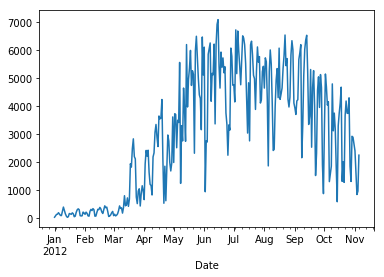

In [65]:
fixed_df['Berri 1'].plot()

We can also plot all the columns just as easily. We'll make it a little bigger, too.
You can see that it's more squished together, but all the bike paths behave basically the same -- if it's a bad day for cyclists, it's a bad day everywhere.

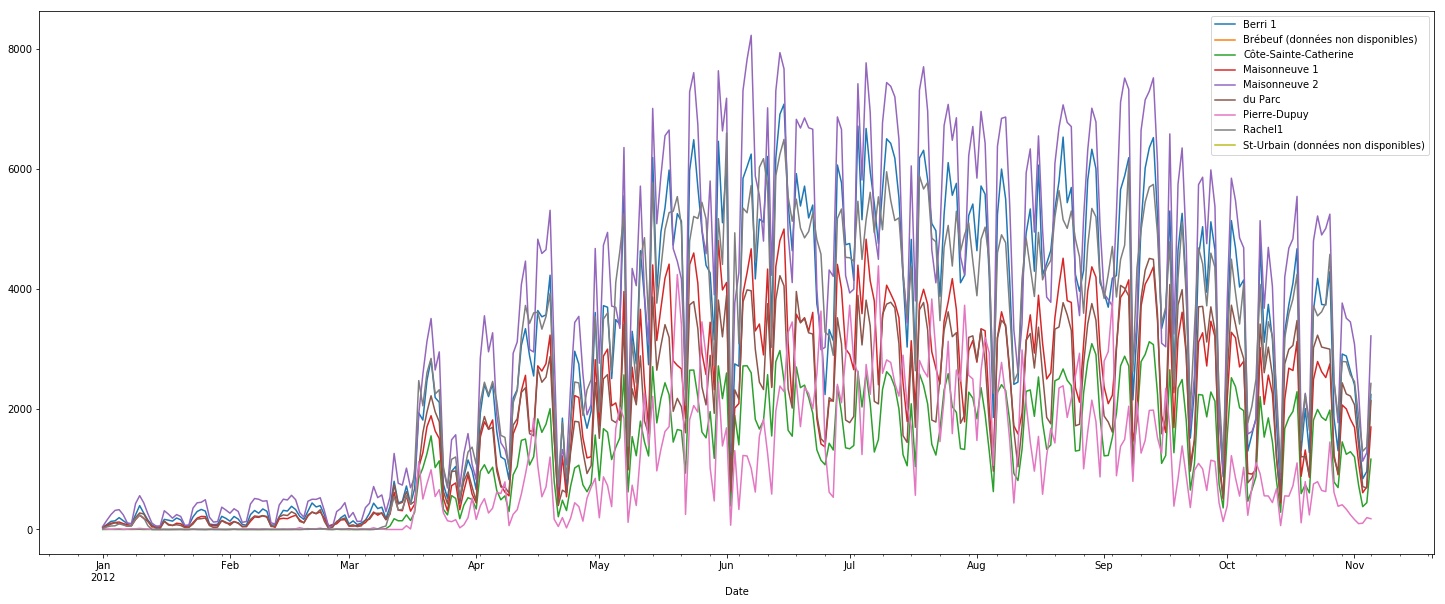

In [44]:
fixed_df.plot(figsize=(25, 10))

<style>
    @font-face {
        font-family: "Computer Modern";
        src: url('http://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');
    }
    div.cell{
        width:800px;
        margin-left:16% !important;
        margin-right:auto;
    }
    h1 {
        font-family: Helvetica, serif;
    }
    h4{
        margin-top:12px;
        margin-bottom: 3px;
       }
    div.text_cell_render{
        font-family: Computer Modern, "Helvetica Neue", Arial, Helvetica, Geneva, sans-serif;
        line-height: 145%;
        font-size: 130%;
        width:800px;
        margin-left:auto;
        margin-right:auto;
    }
    .CodeMirror{
            font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
    }
    .text_cell_render h5 {
        font-weight: 300;
        font-size: 22pt;
        color: #4057A1;
        font-style: italic;
        margin-bottom: .5em;
        margin-top: 0.5em;
        display: block;
    }
    
    .warning{
        color: rgb( 240, 20, 20 )
        }  